### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pickle
import folium
import haversine as hs
from haversine import Unit

from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.pandas.set_option('display.max_columns', None)

c:\Users\edmun\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\edmun\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\edmun\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Importing the dataset 

In [2]:
listings = pd.read_pickle('./data/listings_cleaned.pkl')

In [3]:
listings.shape

(2901, 41)

In [4]:
listings.head()

,id,name,description,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_group_cleansed,latitude,longitude,availability_30,availability_60,availability_90,availability_365,property_type,room_type,accommodates,bedrooms,beds,amenities,instant_bookable,price,number_of_reviews,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,bathroom_qty,bathroom_type
0,50646,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,227796,Sujatha,a few days or more,0.00,0.730118,f,t,t,Bukit Timah,Central Region,1.33432,103.78521,30,60,90,365,Apartment,Private room,2,1.0,1.0,"[""Gym"", ""Washer"", ""Kitchen"", ""TV with standard...",f,80.0,18,0.18,4.56,4.72,4.78,4.78,4.94,4.72,4.50,1,0,1,1.0,baths
1,71609,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4<br /><br ...,367042,Belinda,within an hour,1.00,1.000000,f,t,t,Tampines,East Region,1.34537,103.95887,5,35,65,340,House,Private room,6,2.0,3.0,"[""Children\u2019s books and toys"", ""Iron"", ""Ke...",f,145.0,20,0.15,4.44,4.37,4.00,4.63,4.78,4.26,4.32,6,0,6,1.0,private
2,289234,Booking for 3 bedrooms,This whole place can accomodate 8 pax with own...,367042,Belinda,within an hour,1.00,1.000000,f,t,t,Tampines,East Region,1.34490,103.95979,0,0,10,285,Apartment,Private room,4,3.0,5.0,"[""Children\u2019s books and toys"", ""Iron"", ""Pa...",t,184.0,12,0.10,4.83,4.67,4.75,4.58,4.67,4.33,4.45,6,0,6,3.0,baths
3,294281,5 mins walk from Newton subway,I have 3 bedrooms in a charming British style...,1521514,Elizabeth,within a day,0.80,0.210000,f,t,t,Newton,Central Region,1.31142,103.83924,30,60,90,365,Apartment,Private room,2,1.0,1.0,"[""Private patio or balcony"", ""Iron"", ""Air cond...",f,79.0,133,1.03,4.43,4.33,4.16,4.50,4.66,4.52,4.39,7,1,6,1.0,shared
4,324945,Cozy Blue Room with large window!,"<b>The space</b><br />Great Location, Great pe...",1439258,Kay,within an hour,0.99,0.820000,f,t,t,Bukit Merah,Central Region,1.28828,103.81020,5,5,5,181,Apartment,Private room,1,1.0,1.0,"[""Hot water"", ""Washer"", ""Kitchen"", ""Smart lock...",f,49.0,17,0.14,3.62,3.63,4.00,4.50,4.06,4.00,3.88,44,2,42,0.0,baths


### Feature Engineering

#### Amenities

We will perform feature engineering on the amenities column by
1) Group the amenities into different categories
2) Create a new column for each category
3) Indicate whether the listing has the amenities in the category
4) Drop the original amenities column

In [5]:
listings.shape

(2901, 41)

In [6]:
# Identify the 20 amenities
listings.loc[listings['amenities'].str.contains('Long term stays allowed', case = False), 'Long term stays allowed'] = 1    # Long term stays allowed
listings.loc[listings['amenities'].str.contains('TV|HDTV', case = False), 'Television'] = 1     # Television
listings.loc[listings['amenities'].str.contains('Heating|Heater', case = False), 'Heater'] = 1   # Heater
listings.loc[listings['amenities'].str.contains('Wifi|Ethernet connection', case = False), 'Internet'] = 1    # Internet
listings.loc[listings['amenities'].str.contains('Air conditioning|AC', case = False), 'Air Conditioning'] = 1   # Air Conditioning
listings.loc[listings['amenities'].str.contains('Soap|Shampoo|Conditioner|Toiletries|Shower gel|Essentials', case = False), 'Essentials'] = 1   # Essentials
listings.loc[listings['amenities'].str.contains('Pool', case = False), 'Swimming Pool'] = 1  # Swimming Pool
listings.loc[listings['amenities'].str.contains('Dryer|Washer|Laundromat', case = False), 'Washer'] = 1 # Washer
listings.loc[listings['amenities'].str.contains('Refrigerator|Fridge|Freezer', case = False), 'Refrigerator'] = 1 # Refrigerator
listings.loc[listings['amenities'].str.contains('Cooking|Stove|Oven|Kitchen|Kitchenette|Toaster|Baking', case = False), 'Cooking basics'] = 1   # Cooking basics
listings.loc[listings['amenities'].str.contains('Gym', case = False), 'Gym'] = 1    # Gym
listings.loc[listings['amenities'].str.contains('Bathtub|Hot tub', case = False), 'Bathtub'] = 1    # Bathtub
listings.loc[listings['amenities'].str.contains('Coffee', case = False), 'Coffee'] = 1   # Coffee
listings.loc[listings['amenities'].str.contains('Clothing storage|Wardrobe|Dresser', case = False), 'Clothing storage'] = 1  # Clothing storage
listings.loc[listings['amenities'].str.contains('Backyard|Garden', case = False), 'Garden'] = 1     # Garden
listings.loc[listings['amenities'].str.contains('Elevator', case = False), 'Elevator'] = 1    # Elevator
listings.loc[listings['amenities'].str.contains('Lockbox|Safe', case = False), 'Security Lock'] = 1    # Safe
listings.loc[listings['amenities'].str.contains('Patio or balcony', case = False), 'Patio or balcony'] = 1
listings.loc[listings['amenities'].str.contains('BBQ|Barbeque', case = False), 'BBQ Grill'] = 1
listings.loc[listings['amenities'].str.contains('Sound|Soundbar|Speaker', case = False), 'Sound system'] = 1  # Sound System

In [7]:
# Replace Null for 0 for amenities columns
amenities_col = listings.iloc[:, 41:].columns
# Fill the null values with 0
listings[amenities_col] = listings[amenities_col].fillna(0)

# Drop the original amenities column
listings.drop('amenities', axis = 1, inplace = True)

Since we have created the columns for the specific amenities, let us explore how the amenities affect the price of the listing.

In [8]:
listings.head()

,id,name,description,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_group_cleansed,latitude,longitude,availability_30,availability_60,availability_90,availability_365,property_type,room_type,accommodates,bedrooms,beds,instant_bookable,price,number_of_reviews,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,bathroom_qty,bathroom_type,Long term stays allowed,Television,Heater,Internet,Air Conditioning,Essentials,Swimming Pool,Washer,Refrigerator,Cooking basics,Gym,Bathtub,Coffee,Clothing storage,Garden,Elevator,Security Lock,Patio or balcony,BBQ Grill,Sound system
0,50646,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,227796,Sujatha,a few days or more,0.00,0.730118,f,t,t,Bukit Timah,Central Region,1.33432,103.78521,30,60,90,365,Apartment,Private room,2,1.0,1.0,f,80.0,18,0.18,4.56,4.72,4.78,4.78,4.94,4.72,4.50,1,0,1,1.0,baths,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,71609,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4<br /><br ...,367042,Belinda,within an hour,1.00,1.000000,f,t,t,Tampines,East Region,1.34537,103.95887,5,35,65,340,House,Private room,6,2.0,3.0,f,145.0,20,0.15,4.44,4.37,4.00,4.63,4.78,4.26,4.32,6,0,6,1.0,private,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,289234,Booking for 3 bedrooms,This whole place can accomodate 8 pax with own...,367042,Belinda,within an hour,1.00,1.000000,f,t,t,Tampines,East Region,1.34490,103.95979,0,0,10,285,Apartment,Private room,4,3.0,5.0,t,184.0,12,0.10,4.83,4.67,4.75,4.58,4.67,4.33,4.45,6,0,6,3.0,baths,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,294281,5 mins walk from Newton subway,I have 3 bedrooms in a charming British style...,1521514,Elizabeth,within a day,0.80,0.210000,f,t,t,Newton,Central Region,1.31142,103.83924,30,60,90,365,Apartment,Private room,2,1.0,1.0,f,79.0,133,1.03,4.43,4.33,4.16,4.50,4.66,4.52,4.39,7,1,6,1.0,shared,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,324945,Cozy Blue Room with large window!,"<b>The space</b><br />Great Location, Great pe...",1439258,Kay,within an hour,0.99,0.820000,f,t,t,Bukit Merah,Central Region,1.28828,103.81020,5,5,5,181,Apartment,Private room,1,1.0,1.0,f,49.0,17,0.14,3.62,3.63,4.00,4.50,4.06,4.00,3.88,44,2,42,0.0,baths,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Get the selected features
amenities_feature = listings.iloc[:, 40:].columns.tolist()

In [10]:
amenities_feature

['Long term stays allowed',
 'Television',
 'Heater',
 'Internet',
 'Air Conditioning',
 'Essentials',
 'Swimming Pool',
 'Washer',
 'Refrigerator',
 'Cooking basics',
 'Gym',
 'Bathtub',
 'Coffee',
 'Clothing storage',
 'Garden',
 'Elevator',
 'Security Lock',
 'Patio or balcony',
 'BBQ Grill',
 'Sound system']

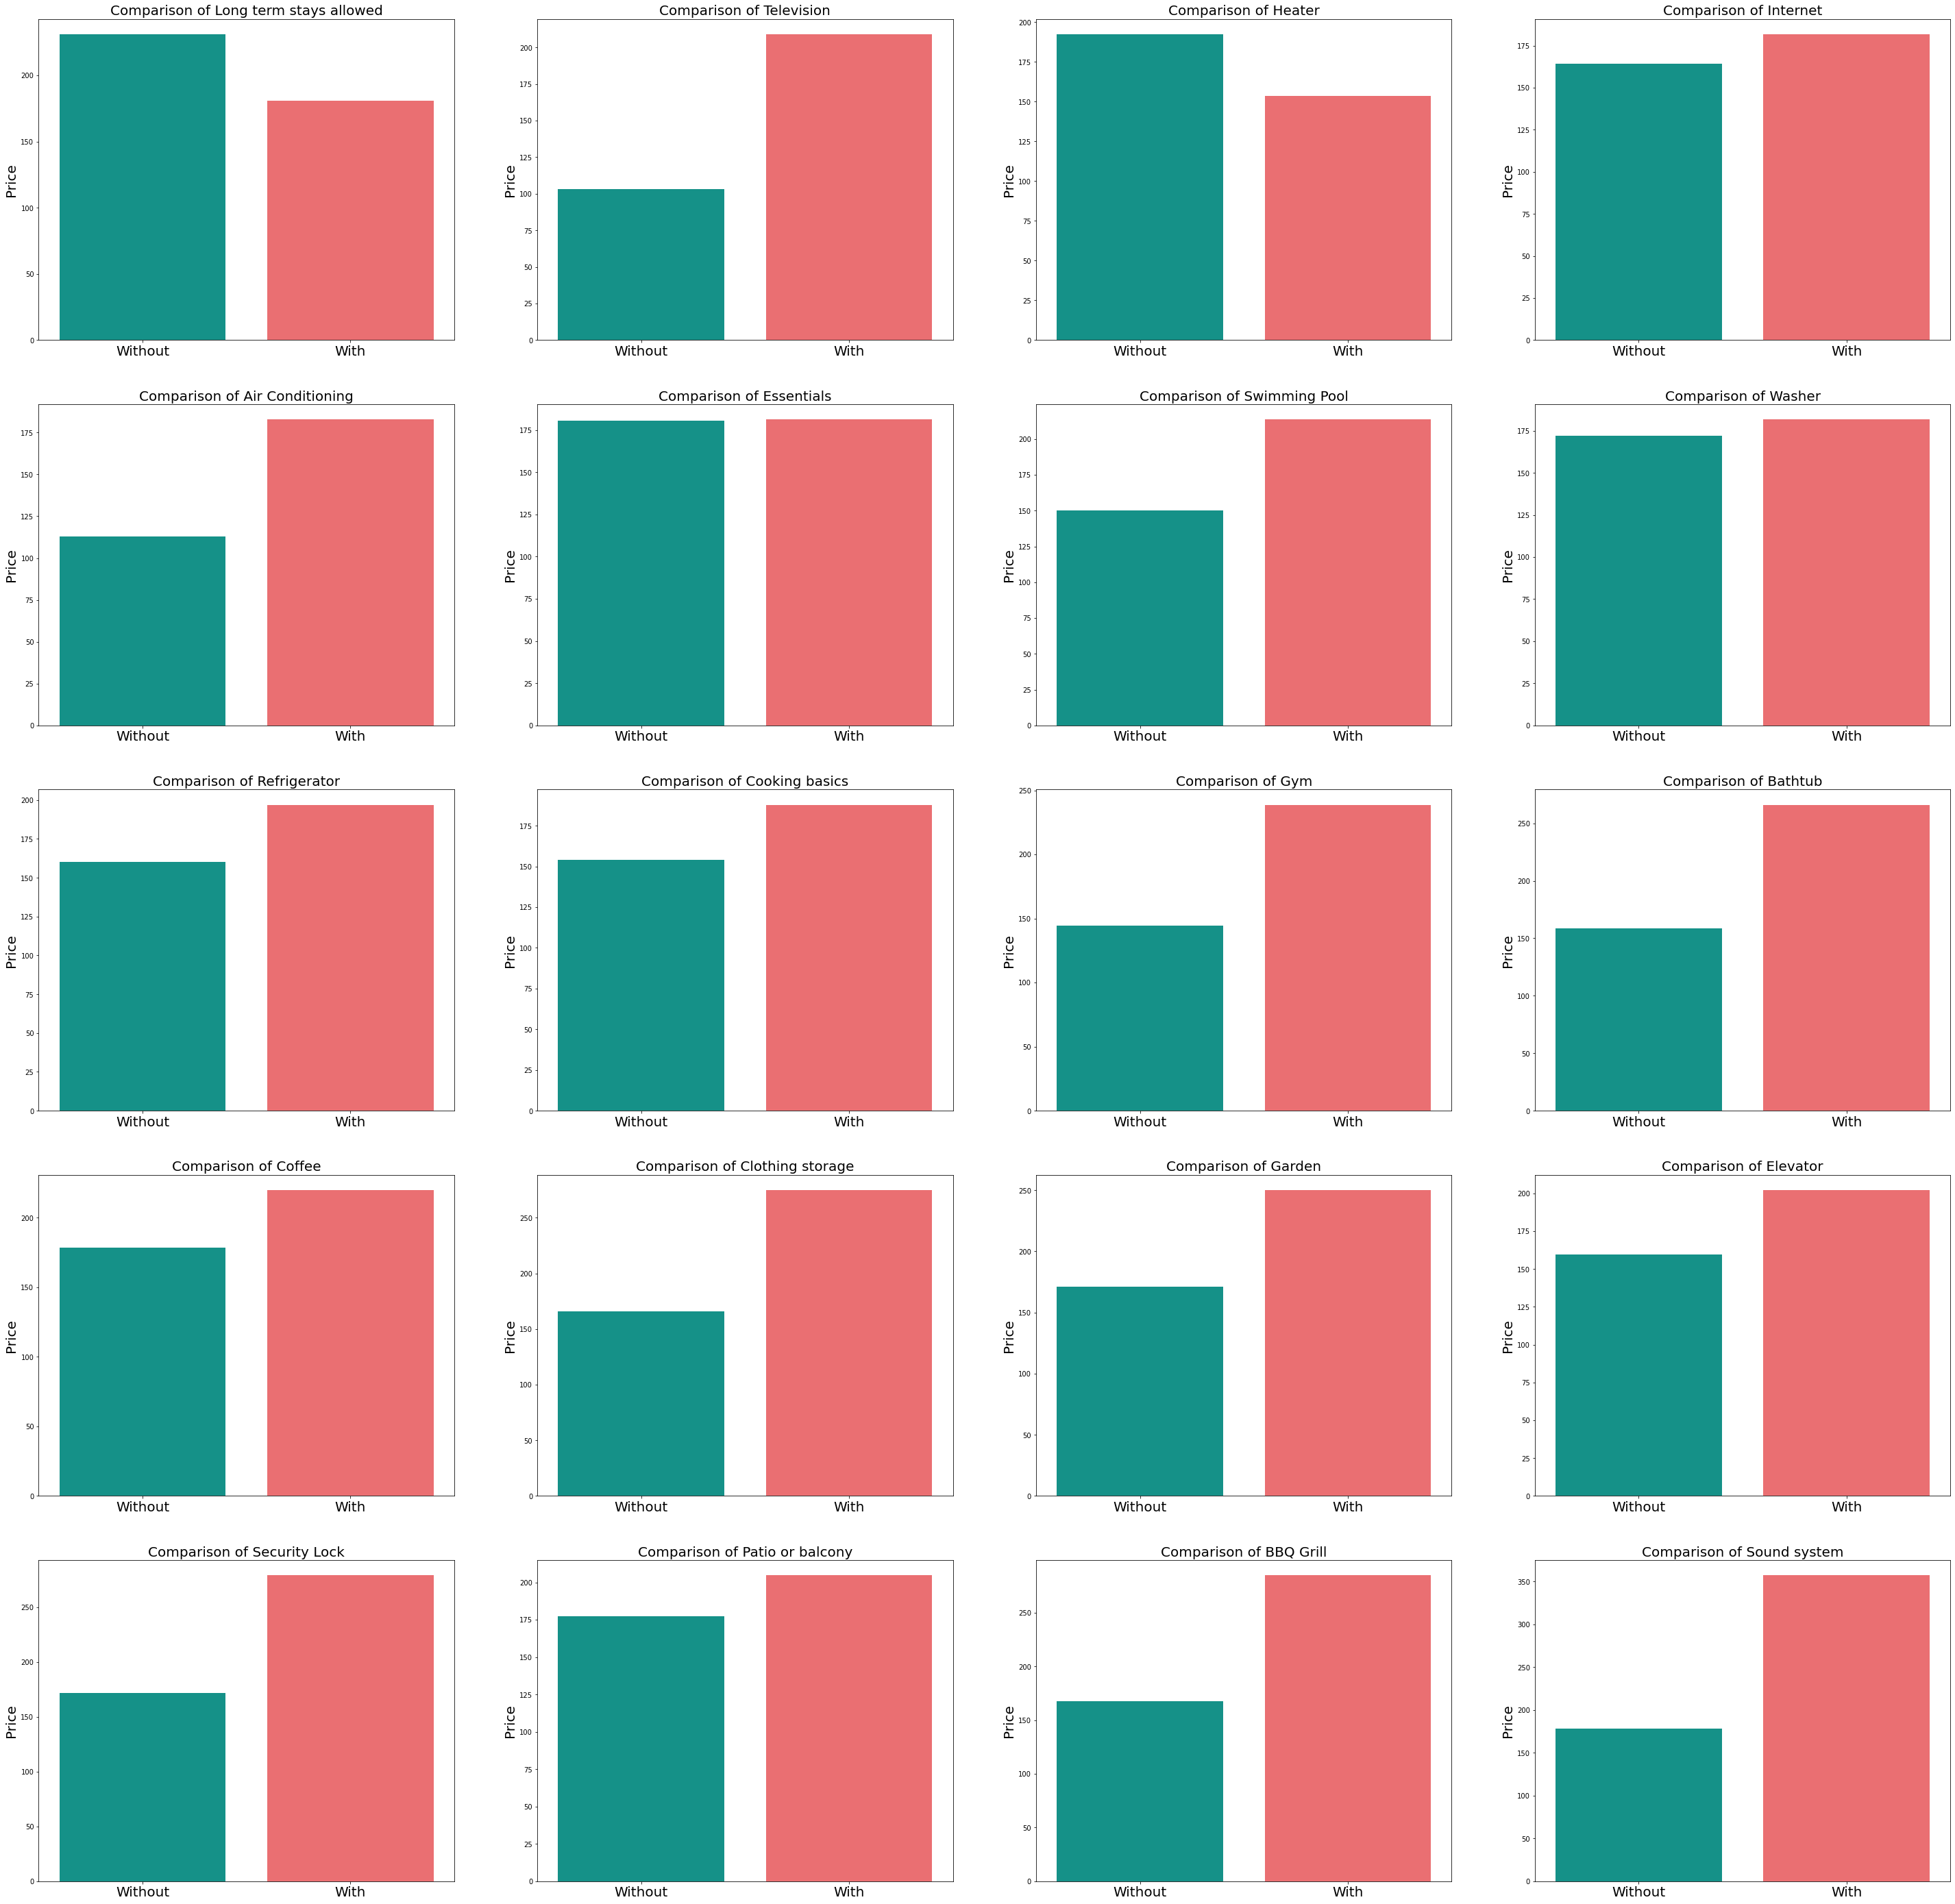

In [11]:
index = 1
fig = plt.figure(1, figsize=(50,50))
colors = ['#00A699','#FF5A5F']
for amenity in amenities_feature:
    
    current_axis = fig.add_subplot(5,4,index)
    temp = listings[listings[amenity] == 0]['price'].mean()
    temp1 = listings[listings[amenity] == 1]['price'].mean()

    x = ['Without', 'With']
    y = [temp, temp1]

    ax = sns.barplot(x=x,y=y, palette=colors);
    title = 'Comparison of ' + amenity
    ax.set_title(title, size=20)
    ax.set_xticklabels(['Without', 'With'], size=20)
    ax.set_ylabel('Price', size = 20)
    index +=1

#### Name and Description of Listings

By having an optimum word count of Listing name and description, it provides renters with important information such as location, amenities and rooms. This help to increase the likelihood of them renting the Airbnb listings. We will perform Feature Engineering to create Word count for the Name and Description of Listings

In [12]:
# Create word count for Name
listings['name_len'] = [len(x) for x in listings['name'].str.split(' ')]
# Create word count for Description
listings['desc_len'] = [len(x) for x in listings['description'].str.split(' ')]

In [13]:
listings.head()

,id,name,description,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_group_cleansed,latitude,longitude,availability_30,availability_60,availability_90,availability_365,property_type,room_type,accommodates,bedrooms,beds,instant_bookable,price,number_of_reviews,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,bathroom_qty,bathroom_type,Long term stays allowed,Television,Heater,Internet,Air Conditioning,Essentials,Swimming Pool,Washer,Refrigerator,Cooking basics,Gym,Bathtub,Coffee,Clothing storage,Garden,Elevator,Security Lock,Patio or balcony,BBQ Grill,Sound system,name_len,desc_len
0,50646,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,227796,Sujatha,a few days or more,0.00,0.730118,f,t,t,Bukit Timah,Central Region,1.33432,103.78521,30,60,90,365,Apartment,Private room,2,1.0,1.0,f,80.0,18,0.18,4.56,4.72,4.78,4.78,4.94,4.72,4.50,1,0,1,1.0,baths,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,89
1,71609,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4<br /><br ...,367042,Belinda,within an hour,1.00,1.000000,f,t,t,Tampines,East Region,1.34537,103.95887,5,35,65,340,House,Private room,6,2.0,3.0,f,145.0,20,0.15,4.44,4.37,4.00,4.63,4.78,4.26,4.32,6,0,6,1.0,private,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8,157
2,289234,Booking for 3 bedrooms,This whole place can accomodate 8 pax with own...,367042,Belinda,within an hour,1.00,1.000000,f,t,t,Tampines,East Region,1.34490,103.95979,0,0,10,285,Apartment,Private room,4,3.0,5.0,t,184.0,12,0.10,4.83,4.67,4.75,4.58,4.67,4.33,4.45,6,0,6,3.0,baths,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,174
3,294281,5 mins walk from Newton subway,I have 3 bedrooms in a charming British style...,1521514,Elizabeth,within a day,0.80,0.210000,f,t,t,Newton,Central Region,1.31142,103.83924,30,60,90,365,Apartment,Private room,2,1.0,1.0,f,79.0,133,1.03,4.43,4.33,4.16,4.50,4.66,4.52,4.39,7,1,6,1.0,shared,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6,165
4,324945,Cozy Blue Room with large window!,"<b>The space</b><br />Great Location, Great pe...",1439258,Kay,within an hour,0.99,0.820000,f,t,t,Bukit Merah,Central Region,1.28828,103.81020,5,5,5,181,Apartment,Private room,1,1.0,1.0,f,49.0,17,0.14,3.62,3.63,4.00,4.50,4.06,4.00,3.88,44,2,42,0.0,baths,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,165


In [14]:
# We will now drop the id, name and description columns
listings.drop(['id', 'name', 'description'], axis = 1, inplace = True)

#### Proximity to MRT Stations and City Centre

As with properties in Singapore, Listings are likely to be higher in value if they are close to MRT stations.

We can retrieve the location of the MRT stations from the public dataset:
- https://www.kaggle.com/datasets/yxlee245/singapore-train-station-coordinates

#### MRT Stations

In [15]:
mrt = pd.read_csv('./data/mrt_lrt_data.csv')

In [16]:
mrt.head()

,station_name,type,lat,lng
0,Jurong East,MRT,1.333207,103.742308
1,Bukit Batok,MRT,1.349069,103.749596
2,Bukit Gombak,MRT,1.359043,103.751863
3,Choa Chu Kang,MRT,1.385417,103.744316
4,Yew Tee,MRT,1.397383,103.747523


In [17]:
# We see that there are LRT services in the dataset
# However, we will only be using MRT services for this project

mrt = mrt[mrt['type'] == 'MRT']

In [18]:
mrt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station_name  119 non-null    object 
 1   type          119 non-null    object 
 2   lat           119 non-null    float64
 3   lng           119 non-null    float64
dtypes: float64(2), object(2)
memory usage: 4.6+ KB


In [19]:
# Let us plot the MRT and LRT location on the Singapore map

# Plot Singapore map
sg_map = folium.Map([1.3521, 103.8198], zoom_start = 11.5, tiles = 'Stamen Toner')

In [20]:
# Plot the coordinates of the MRT and LRT stations on the map
# Denote the Mrt stations with a blue circle

for i in range(0, len(mrt)):
    folium.CircleMarker([mrt.iloc[i]['lat'], mrt.iloc[i]['lng']],
                        radius = 4,
                        color = 'blue',
                        popup = mrt.iloc[i]['station_name'],
                        fill = True,
                        fill_color = 'blue',
                        fill_opacity = 0.6).add_to(sg_map)

sg_map

In [21]:
# Find the distance for the first listing to its nearest MRT station using Haversine formula
mrtCoord = mrt[['lat', 'lng']]
firstListings = listings[['latitude', 'longitude']].iloc[0]
Disp = [hs.haversine((firstListings[0], firstListings[1]), (station[0], station[1]), unit = Unit.KILOMETERS) for station in mrtCoord.values.tolist()]
minDisp = min(Disp)
mrtIdx = Disp.index(minDisp)
mrtName = mrt['station_name'].iloc[mrtIdx]
print(f'The nearest MRT station to the first listing is {mrtName} with a distance of {round((minDisp),3)} km')

The nearest MRT station to the first listing is King Albert Park with a distance of 0.272 km


In [22]:
# Find the distance from each listing to the nearest MRT station using the Haversine formula
mrtCoord = mrt[['lat', 'lng']]
listingsCoord = listings[['latitude', 'longitude']]
mrtDisp = [min([hs.haversine((listing[0],listing[1]), (station[0],station[1]), unit=Unit.KILOMETERS) for station in mrtCoord.values.tolist()]) for listing in listingsCoord.values.tolist()]
mrtIdx = [np.argmin([hs.haversine((listing[0],listing[1]), (station[0],station[1]), unit=Unit.KILOMETERS) for station in mrtCoord.values.tolist()]) for listing in listingsCoord.values.tolist()]
mrtName = [mrt['station_name'].iloc[idx] for idx in mrtIdx]
listings["mrtDisp"] = mrtDisp
listings["nearestMRT"] = mrtName

#### City Centre

From Wikipedia, we can obtain the latitude and longitude of Singapore City Centre which is of Latitude: 1.291667, Longitude: 103.85. This is at approximately the location of Funan Shopping Centre.

In [23]:
# Create a dataframe for City centre coordinate 
city_centre = pd.DataFrame({'city_centre': ['City Centre'], 'lat': [1.2833], 'lng': [103.8500]})

In [24]:
city_centre

,city_centre,lat,lng
0,City Centre,1.2833,103.85


In [25]:
# Circle Town centre with a red circle
folium.CircleMarker(
    [1.2833, 103.8500],
    radius = 8,
    color = 'red',
    popup = 'City Centre',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(sg_map)

sg_map

In [26]:
# Find the distance from each listing to city centre
cityCoord = city_centre[["lat", "lng"]]
listingCoord = listings[["latitude", "longitude"]]
cityDisp = [min([hs.haversine((listing[0],listing[1]), (city[0],city[1]), unit=Unit.KILOMETERS) for city in cityCoord.values.tolist()]) for listing in listingCoord.values.tolist()]
listings["cityDisp"] = cityDisp

In [27]:
listings.head()

,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_group_cleansed,latitude,longitude,availability_30,availability_60,availability_90,availability_365,property_type,room_type,accommodates,bedrooms,beds,instant_bookable,price,number_of_reviews,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,bathroom_qty,bathroom_type,Long term stays allowed,Television,Heater,Internet,Air Conditioning,Essentials,Swimming Pool,Washer,Refrigerator,Cooking basics,Gym,Bathtub,Coffee,Clothing storage,Garden,Elevator,Security Lock,Patio or balcony,BBQ Grill,Sound system,name_len,desc_len,mrtDisp,nearestMRT,cityDisp
0,227796,Sujatha,a few days or more,0.00,0.730118,f,t,t,Bukit Timah,Central Region,1.33432,103.78521,30,60,90,365,Apartment,Private room,2,1.0,1.0,f,80.0,18,0.18,4.56,4.72,4.78,4.78,4.94,4.72,4.50,1,0,1,1.0,baths,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,89,0.272114,King Albert Park,9.168433
1,367042,Belinda,within an hour,1.00,1.000000,f,t,t,Tampines,East Region,1.34537,103.95887,5,35,65,340,House,Private room,6,2.0,3.0,f,145.0,20,0.15,4.44,4.37,4.00,4.63,4.78,4.26,4.32,6,0,6,1.0,private,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8,157,0.456774,Upper Changi,13.932315
2,367042,Belinda,within an hour,1.00,1.000000,f,t,t,Tampines,East Region,1.34490,103.95979,0,0,10,285,Apartment,Private room,4,3.0,5.0,t,184.0,12,0.10,4.83,4.67,4.75,4.58,4.67,4.33,4.45,6,0,6,3.0,baths,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,174,0.353956,Upper Changi,13.995598
3,1521514,Elizabeth,within a day,0.80,0.210000,f,t,t,Newton,Central Region,1.31142,103.83924,30,60,90,365,Apartment,Private room,2,1.0,1.0,f,79.0,133,1.03,4.43,4.33,4.16,4.50,4.66,4.52,4.39,7,1,6,1.0,shared,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6,165,0.300294,Newton,3.347789
4,1439258,Kay,within an hour,0.99,0.820000,f,t,t,Bukit Merah,Central Region,1.28828,103.81020,5,5,5,181,Apartment,Private room,1,1.0,1.0,f,49.0,17,0.14,3.62,3.63,4.00,4.50,4.06,4.00,3.88,44,2,42,0.0,baths,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,165,0.748483,Redhill,4.458968


#### Availability

The value in the availability columns are in the form of no. of days available in the next 30/60/90/365 days. \
To make it more intuitive, we will convert the values to a ratio of the total days available.

In [28]:
# Convert the availability columns to percentage
listings['availability_30'] = listings['availability_30']/30
listings['availability_60'] = listings['availability_60']/60
listings['availability_90'] = listings['availability_90']/90
listings['availability_365'] = listings['availability_365']/365

### Feature Selection

#### Manual Selection
We will drop features that are irrelevant for machine learning
- Host Identifiers

In [29]:
# Drop identifiers
listings.drop(['host_name', 'host_id'], axis=1, inplace=True)

In [30]:
listings.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'property_type', 'room_type', 'accommodates',
       'bedrooms', 'beds', 'instant_bookable', 'price', 'number_of_reviews',
       'reviews_per_month', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms', 'bathroom_qty',
       'bathroom_type', 'Long term stays allowed', 'Television', 'Heater',
       'Internet', 'Air Conditioning', 'Essentials', 'Swimming Pool', 'Washer',
     

#### Multicollinearity ####

In [37]:
listings.iloc[:,35:].columns

Index(['Long term stays allowed', 'Television', 'Heater', 'Internet',
       'Air Conditioning', 'Essentials', 'Swimming Pool', 'Washer',
       'Refrigerator', 'Cooking basics', 'Gym', 'Bathtub', 'Coffee',
       'Clothing storage', 'Garden', 'Elevator', 'Security Lock',
       'Patio or balcony', 'BBQ Grill', 'Sound system', 'name_len', 'desc_len',
       'mrtDisp', 'nearestMRT', 'cityDisp'],
      dtype='object')

In [40]:
listings_noamenities = listings.iloc[:,0:34]

<AxesSubplot:>

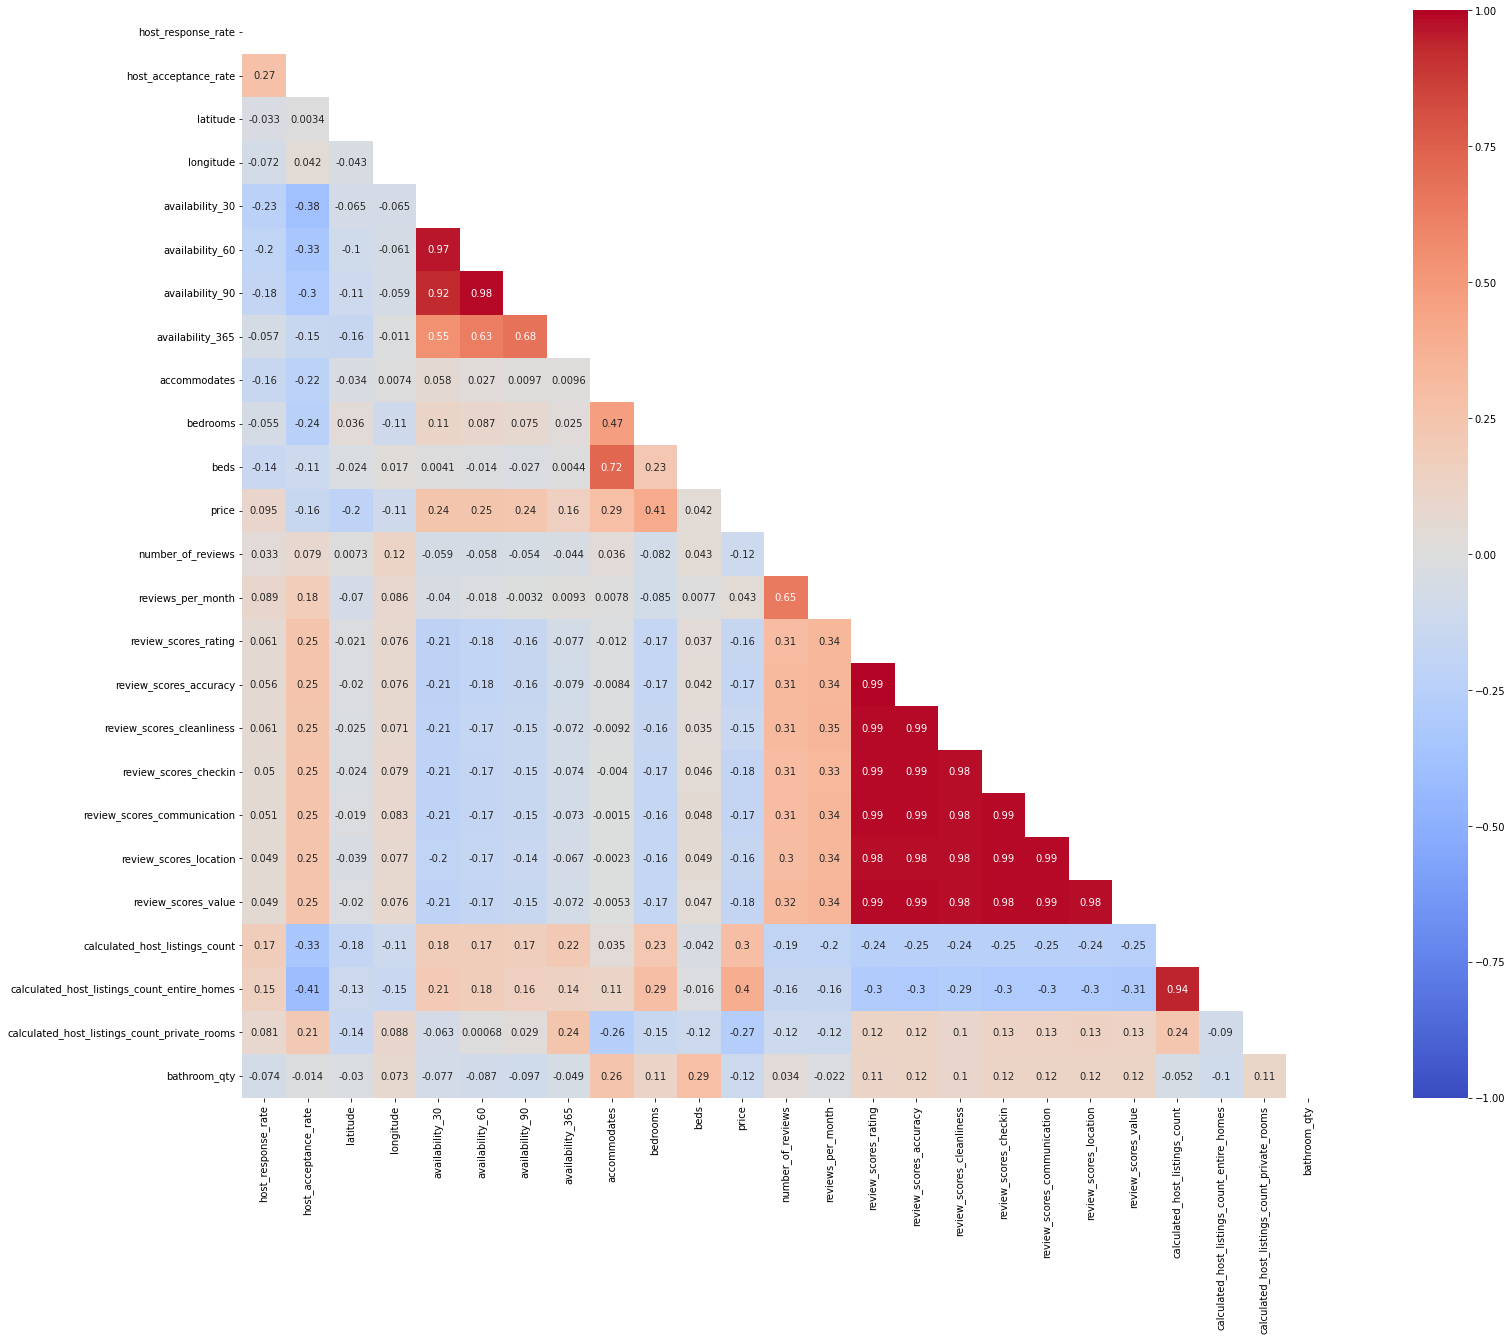

In [41]:
# Correlation heatmap of numerical variables
corr = listings_noamenities.corr()

fig, ax = plt.subplots(figsize=(30,20))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
sns.heatmap(data= corr,       
            mask= mask,
            cmap = 'coolwarm',
            square= True,          
            annot = True,
            vmin=-1, vmax=1)


In [ ]:
From the heatmap, we can see that there are some features that are highly correlated (>0.90) with each other. The features are as follows:
- Availability for 30, 60, 90 days
- Reviews: Accuracy, Cleanliness, Checkin, Communication, Location, Value
- Calculated host listings: Entire home, Count

We will compute the VIF of these features 

In [42]:
considered_features = ['availability_30', 'availability_60', 'availability_90', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes']

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(considered_features):

    X = listings[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Features']!='intercept']
    return vif

In [44]:
compute_vif(considered_features).sort_values('VIF', ascending=False)

<ipython-input-43-78fffa4eb6de>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Features,VIF
1,availability_60,124.074785
3,review_scores_accuracy,81.681023
6,review_scores_communication,74.122890
5,review_scores_checkin,68.511795
8,review_scores_value,63.336107
2,availability_90,54.845309
7,review_scores_location,49.764760
4,review_scores_cleanliness,44.622729
0,availability_30,26.763851
10,calculated_host_listings_count_entire_homes,10.853047


We will remove the feature with the highest VIF value and check the VIF values again. We will repeat this process until all the VIF values are less than 10.

In [46]:
considered_features.remove('availability_60')
compute_vif(considered_features).sort_values('VIF', ascending=False)

<ipython-input-43-78fffa4eb6de>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Features,VIF
2,review_scores_accuracy,81.673440
5,review_scores_communication,74.109005
4,review_scores_checkin,68.465087
7,review_scores_value,63.309032
6,review_scores_location,49.746763
3,review_scores_cleanliness,44.600860
9,calculated_host_listings_count_entire_homes,10.780097
8,calculated_host_listings_count,10.300963
0,availability_30,7.372738
1,availability_90,7.166923


In [47]:
considered_features.remove('review_scores_accuracy')
compute_vif(considered_features).sort_values('VIF', ascending=False)

<ipython-input-43-78fffa4eb6de>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Features,VIF
4,review_scores_communication,69.072445
3,review_scores_checkin,65.081712
6,review_scores_value,55.324106
5,review_scores_location,49.714804
2,review_scores_cleanliness,39.303726
8,calculated_host_listings_count_entire_homes,10.779148
7,calculated_host_listings_count,10.300950
0,availability_30,7.371452
1,availability_90,7.165910


In [48]:
considered_features.remove('review_scores_communication')
compute_vif(considered_features).sort_values('VIF', ascending=False)

<ipython-input-43-78fffa4eb6de>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Features,VIF
5,review_scores_value,50.893117
3,review_scores_checkin,49.784444
4,review_scores_location,45.630716
2,review_scores_cleanliness,39.242346
7,calculated_host_listings_count_entire_homes,10.778191
6,calculated_host_listings_count,10.298494
0,availability_30,7.371017
1,availability_90,7.165899


In [49]:
considered_features.remove('review_scores_value')
compute_vif(considered_features).sort_values('VIF', ascending=False)

<ipython-input-43-78fffa4eb6de>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Features,VIF
3,review_scores_checkin,45.084286
4,review_scores_location,40.255943
2,review_scores_cleanliness,32.548124
6,calculated_host_listings_count_entire_homes,10.707203
5,calculated_host_listings_count,10.266090
0,availability_30,7.360976
1,availability_90,7.151549


In [50]:
considered_features.remove('review_scores_checkin')
compute_vif(considered_features).sort_values('VIF', ascending=False)

<ipython-input-43-78fffa4eb6de>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Features,VIF
3,review_scores_location,25.216433
2,review_scores_cleanliness,24.954354
5,calculated_host_listings_count_entire_homes,10.611568
4,calculated_host_listings_count,10.203252
0,availability_30,7.360106
1,availability_90,7.151280


In [51]:
considered_features.remove('review_scores_location')
compute_vif(considered_features).sort_values('VIF', ascending=False)

<ipython-input-43-78fffa4eb6de>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Features,VIF
4,calculated_host_listings_count_entire_homes,10.187918
3,calculated_host_listings_count,9.853316
0,availability_30,7.354972
1,availability_90,7.148738
2,review_scores_cleanliness,1.131973


In [52]:
considered_features.remove('calculated_host_listings_count_entire_homes')
compute_vif(considered_features).sort_values('VIF', ascending=False)

<ipython-input-43-78fffa4eb6de>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Features,VIF
0,availability_30,6.930239
1,availability_90,6.786160
2,review_scores_cleanliness,1.108822
3,calculated_host_listings_count,1.083817


In [53]:
# Collate the features that are to be dropped
drop_features = ['availability_60','review_scores_accuracy','review_scores_communication','review_scores_value','review_scores_checkin','review_scores_location',
                 'calculated_host_listings_count_entire_homes']

In [54]:
# Drop the features
listings.drop(drop_features, axis=1, inplace=True)

#### Save the cleaned dataset

In [31]:
# Save the listings_final dataframe to a csv file
listings.to_csv('./data/listings_final.csv', index=False)